<a href="https://colab.research.google.com/github/AhmetCannnn/deep_learning_projects/blob/main/the_problem_of_solid_waste_classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COLAB BAĞLANTISININ YAPILMASI


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# EvrişimliSinir Ağları (CNN) ile Katı Atık Tespiti

**1)İş problemi(Business Problem)**

**2)Veriyi Anlamak(Data Understanding)**

**3)Veriyi Hazırlamak(Data Preparation)**

**4)Modelleme(Modeling)**

**5)Değerlendirme(Evaluation)**

In [ ]:
# pip install imutils

# Veri okumada kullanılacak kütüphaneler

import cv2
import urllib
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import random, os, glob
from imutils import paths
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from urllib.request import urlopen

# warninglerikapatma
import warnings
warnings.filterwarnings('ignore')

# model değerlendirmede kullanılacak kütüphaneler
from sklearn.metrics import confusion_matrix, classification_report

# model için kullanılacak kütüphaneler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img





In [ ]:
# Drive'da bu veri setinde yer alan görüntülerin oldığu path bilgisinin tutulması
dir_path = '/content/drive/MyDrive/Garbage classification'

In [ ]:
#Target size ve Label etiket değerlerinin belirlenmesi

target_size = (224, 224)

waste_labels = {'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

In [ ]:
def load_datasets(path):
  """Görsellerin bulunduğu dizindeki görüntüyü okuyup etiketlerini oluşturur.

  Parametreler:

  path: Görsellerin bulunduğu dizini ifade eder.

  Return:

  x: Görüntülere ait matris bilgilerini tutar.

  labels: Görüntünün ait olduğu sınıf bilgisini tutan liste.

  """
  x = []
  labels = []

  # Gönderdiğimiz pathdeki görüntüleri listeleyip sıralamaktadır.
  image_paths = sorted(list(paths.list_images(path)))

  for image_path in image_paths:
    # Belirtilen pathdeki görüntüler openCv kütüphanesi ile okunmaktadır.
    img = cv2.imread(image_path)

    # Okunan görüntüler başlangıçta belirlenen target_size'a göre yeniden ölçeklendirilir.
    img = cv2.resize(img, target_size)

    # Ölçeklendirilen görüntüler x listesine eklenir.
    x.append(img)

    # Her bir path '/' ifadesi ile ayrıldığında dönen listenin sondan ikinci elemanı labelı temsil etmektedir.
    label = image_path.split(os.path.sep)[-2]

    # Yakalanan labellerın sayısal değer karşılıklarının oldugu waste_labels sozlugu içerisinden gönderilen
    # key değerine karşılık value değeri alınarak label oluşturulur.
    labels.append(waste_labels[label])


  #Veri seti random bir şekilde karıştırılır.
  x, labels = shuffle(x, labels, random_state=42)

  # Boyut ve sınıf bilgisi raporlanmaktadır.
  print(f"X boyutu: {np.array(x).shape}")
  print(f"Label sınıf sayısı: {len(np.unique(labels))} Gözlem syaısı: {len(labels)}")

  return x, labels


In [ ]:
x, labels = load_datasets(dir_path)

X boyutu: (2527, 224, 224, 3)
Label sınıf sayısı: 6 Gözlem syaısı: 2527


In [ ]:
# Görüntü boyutlarının tutulması
input_shape = (np.array(x[0]).shape[1], np.array(x[0]).shape[1], 3)
print(input_shape)

(224, 224, 3)


# Veri Setinden Örnekler Gösterilmesi

In [ ]:
def visualize_img(image_batch, label_batch):

  """
  Veri seti içerisinden görüntü görselleştirir.

 Parametreler:

 image_batch: Görüntülere ait matris bilgilerinin tutar.

 label_barch:  Görüntünün ait olduğu sınıf bilgisini tutan liste.
 """
  plt.figure(figsize=(10,10))
  for n in range(10):
    ax = plt.subplot(5, 5, n+1)
    plt.imshow(image_batch[n])
    plt.title(np.array(list(waste_labels.keys()))[to_categorical(labels, num_classes=6)[n]==1][0].title())
    plt.axis('off')

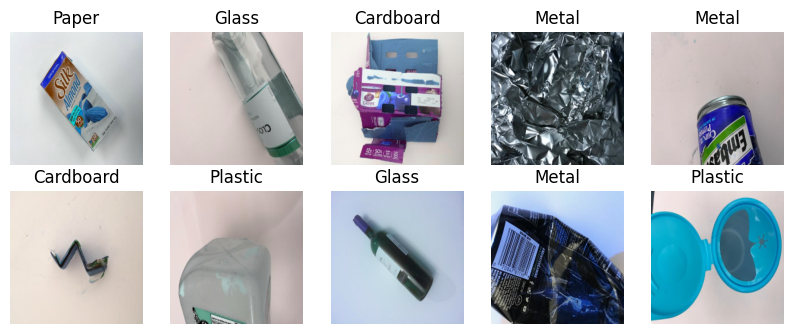

In [ ]:
visualize_img(x, labels)

## Veriyi Hazırlama

In [ ]:
# Train veri seti içinbir generator tanımlıyoruz.
train = ImageDataGenerator(horizontal_flip=True,
                           vertical_flip=True,
                           validation_split=0.1,
                           rescale=1./255,
                           shear_range=0.1,
                           zoom_range=0.1,
                           width_shift_range = 0.1,
                           height_shift_range =0.1)

# Test veri seti için generator tanımlıyoruz.
test = ImageDataGenerator(rescale=1/255,
                          validation_split=0.1)

In [ ]:
train_generator = train.flow_from_directory(directory = dir_path,
                                            target_size = target_size, # Change 'target' to 'target_size'
                                            class_mode = 'categorical',
                                            subset = 'training')

test_generator = test.flow_from_directory(directory = dir_path,
                                           target_size = target_size, # Change 'target' to 'target_size'
                                           batch_size = 251,
                                            class_mode = 'categorical',
                                            subset = 'validation')

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.


# Modelleme

**Sıfırda CNN Modeli Kurma**

**Sequential**

**Evrişim Katmanı(Convolution Layer, Conv2D**

***Havuzlama Katmanı(Pooling Layer)**

**Aktivasyon Fonksiyonu Katmanı(Activation
Layer)**

**Flattening Katmanı**

**Dense Katamanı**

**Dropout Katmanı**



In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(input_shape), activation='relu'))
model.add(MaxPooling2D()) # MaxPooling2D'nin bir örneğini oluştur

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D()) # MaxPooling2D'nin bir örneğini oluştur


model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D()) # MaxPooling2D'nin bir örneğini oluştur

model.add(Flatten())

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(units=6, activation='softmax'))

# Model Özeti

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 112, 112, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,605,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,629,638 (6.22 MB)

 Trainable params: 1,629,638 (6.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model.compile(loss='categorical_crossentropy',
              optimizer='adam',  # Correct the optimizer name
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), 'acc'])

# aşırı öğrenmeyi engelleme adımları (early stopping)
callbacks = [EarlyStopping(monitor='val_loss', patience=50, verbose=1, mode='min'),

             ModelCheckpoint(filepath='mymodel.keras',  # Change the file extension to '.keras'
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             save_weights_only=False,
                             verbose=1)]

# Modelin Eğitilmesi

In [ ]:
history = model.fit(train_generator,
            epochs=150,
            validation_data=test_generator,
            callbacks=callbacks,
            steps_per_epoch=2276//32,
            validation_steps=251//32)

Epoch 1/150
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.8000 - loss: 0.5420 - precision_2: 0.8656 - recall_1: 0.7374
Epoch 1: val_loss improved from 0.55795 to 0.55757, saving model to mymodel.keras
71/71 ━━━━━━━━━━━━━━━━━━━━ 232s 3s/step - acc: 0.8000 - loss: 0.5421 - precision_2: 0.8655 - recall_1: 0.7375 - val_acc: 0.8008 - val_loss: 0.5576 - val_precision_2: 0.8377 - val_recall_1: 0.7610
Epoch 2/150
 1/71 ━━━━━━━━━━━━━━━━━━━━ 2:17 2s/step - acc: 0.6875 - loss: 0.8334 - precision_2: 0.7000 - recall_1: 0.6562
Epoch 2: val_loss improved from 0.55757 to 0.54608, saving model to mymodel.keras
71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - acc: 0.6875 - loss: 0.8334 - precision_2: 0.7000 - recall_1: 0.6562 - val_acc: 0.8048 - val_loss: 0.5461 - val_precision_2: 0.8616 - val_recall_1: 0.7689
Epoch 3/150
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.8082 - loss: 0.5367 - precision_2: 0.8531 - recall_1: 0.7618
Epoch 3: val_loss did not improve from 0.54608
71/71 ━━━━━━━━━━━━━━━━━━━━ 206s 3s/

# Accuracy ve Loss Grafikleri


In [ ]:
# Accuracy Grafiği

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim(min(plt.ulim()),1)
plt.title('Training and Validation Accuracy', fontsize=16)

# Loss Grafiği

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.ylim([0, max(plt.ylim())])
plt.title('Training and Validation Loos', fontsize=16)
plt.show()



# Değerlendirme (Evaluation)

In [ ]:
loss,, precision, recalll, acc = model.evaluate(test_generator, batch_size=32)

In [ ]:
print("\nTest accuracy: %.lf%%" % (100.0 * acc))
print("\nTest loss: %.lf%%" % (100.0 * loss))
print("\nTest precision: %.lf%%" % (100.0 * precision))
print("\nTest recall: %.lf%%" % (100.0 * recall))

In [ ]:
# Classification Report
x_test, y_test = test_generator.next()

y_pred= model.predict(x_test)

y_pred = np.argmax(y_pred, axis=1)

y_test = np.argmax(y_test, axis=1)

In [ ]:
target_names = list(waste_labesl.keys())


In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):

  """
  Thisfunction prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True'.
  """

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


  plt.figure(figsize=(8, 6))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.xticks(ticks_marks, classes)
  fmt = '.2hf' if normalize else 'd'
  thres = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color = "whitw", if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label', fontweight="bold")
  plt.xlabel('Predicted label', fontweight=bold)


In [ ]:
plot_confusion_matrix(cm, waste_labels.keys(),
                      title='Confusion Matrix',
                      cmap=plt.OrRd)